In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils


In [87]:
data=pd.read_csv("./fashion-mnist_test.csv")

In [88]:

x = data.values
X = x[:,1:]
y = x[:,0]
X=X/(255.0)


y = np_utils.to_categorical(y)
print (X.shape, y.shape)

(10000, 784) (10000, 10)


In [89]:
X_train=X[:8000,:]

Y_train=y[:8000,:]

X_test=X[8000:,:]
Y_test=y[8000:,:]

print(X_train.shape,Y_train.shape)

(8000, 784) (8000, 10)


In [90]:
model=Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [91]:
adam=Adam(lr=0.01)


In [92]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [97]:
history=model.fit(X_train,Y_train,epochs=25,batch_size=400,shuffle=True,validation_data=(X_test,Y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/25
8000/8000 [==============================] - 0s 19us/step - loss: 0.3290 - acc: 0.8811 - val_loss: 0.4500 - val_acc: 0.8420
Epoch 2/25
8000/8000 [==============================] - 0s 17us/step - loss: 0.3476 - acc: 0.8724 - val_loss: 0.3918 - val_acc: 0.8655
Epoch 3/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.2963 - acc: 0.8872 - val_loss: 0.4315 - val_acc: 0.8500
Epoch 4/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.3001 - acc: 0.8891 - val_loss: 0.4622 - val_acc: 0.8445
Epoch 5/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.2840 - acc: 0.8952 - val_loss: 0.3975 - val_acc: 0.8665
Epoch 6/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.2516 - acc: 0.9065 - val_loss: 0.3881 - val_acc: 0.8695
Epoch 7/25
8000/8000 [==============================] - 0s 16us/step - loss: 0.2549 - acc: 0.9026 - val_loss: 0.4444 - val_acc: 0.8440
Epoch 8

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

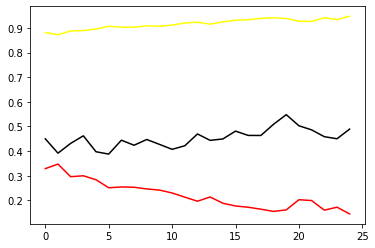

In [98]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['acc'],color='yellow')
plt.plot(history.history['val_loss'],color='black')
plt.figure